In [2]:
%matplotlib inline
from matplotlib import pyplot
import numpy
import numpy as np
import healpy

from scipy.interpolate import NearestNDInterpolator


import logging
logging.basicConfig(level=logging.DEBUG)

import healpy

import vm
from vm.pypelid.survey.observation import Survey
from vm.pypelid.utils import wcs_lib
from vm.pypelid.sky.extinction import Extinction

In [10]:
E = Extinction(in_dir='/Users/ben/euclid/pypelid/data/')
map = healpy.ud_grade(E.ebv_map, nside, order_in='nest', order_out='ring')

DEBUG:vm.pypelid.sky.extinction:Read E(B-V) map: /Users/ben/euclid/pypelid/data//HFI_CompMap_ThermalDustModel_2048_R1.20.fits


In [20]:
nside = 128
theta, phi = healpy.pix2ang(nside, np.arange(12*nside**2))
ra = 180/np.pi * phi
dec = 90 - 180/np.pi * theta
lon,lat = wcs_lib.equatorial_to_galactic(ra, dec)
p = healpy.ang2pix(nside, np.pi/180*(90-lat), np.pi/180*lon)
m = map[p]

In [21]:
Swide = Survey(
    survey_file='/Users/ben/euclid/pypelid/in/EUC_SOC_OSSSURVEY-SC3_20170105T140137.4Z_02.00.xml',
    surveyid='WIDE_SURVEY', 
    dither_offsets=(0,0),
    dither_angles=(0,),
    verbose=True, 
    pixel_mask_nside=128,
)

DEBUG:vm.pypelid.survey.observation:Loading /Users/ben/euclid/pypelid/in/EUC_SOC_OSSSURVEY-SC3_20170105T140137.4Z_02.00.xml
DEBUG:vm.pypelid.survey.observation:Selecting SurveyId WIDE_SURVEY
DEBUG:vm.pypelid.survey.observation:> Computing dither positions and orientations of 31486 fields.


In [22]:
Swide.survey_mask()

In [23]:
Swide.mask._build_pixel_mask()

DEBUG:minimask.mask:Building mask lookup tree
DEBUG:minimask.mask:Mask search radius: 0.002098
DEBUG:minimask.mask:build pixel mask nside=128 order=ring


In [24]:
outside = Swide.mask.params['pixel_mask'] == False

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


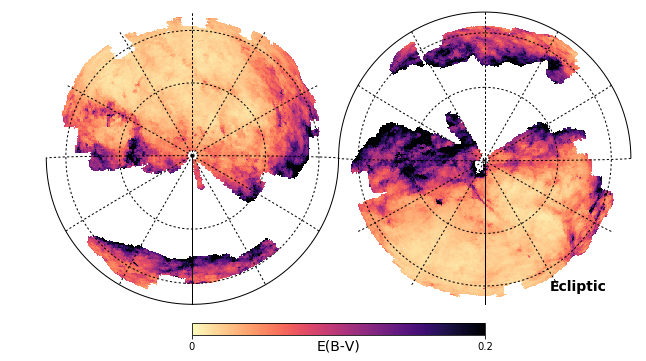

In [112]:
# fig=pyplot.figure(0,figsize=(5,3))

m[outside] = float('nan')

from matplotlib import cm
cmap = cm.magma_r
cmap.set_under('w')
cmap.set_bad('w')
healpy.orthview(m, min=0, max=0.2, coord=('C','E'), rot=(0,89), cmap=cmap, cbar=True, title="", unit="E(B-V)")
healpy.graticule()
pyplot.savefig("figs/ebv_map.pdf")

In [72]:
h,e = np.histogram(m[np.isfinite(m)],bins=10000)
c = h.cumsum()
c = c*1./c[-1]

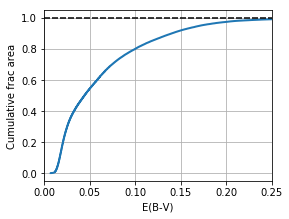

In [113]:
pyplot.figure(figsize=(4,3))
pyplot.plot(e[:-1], c, ls='steps', lw=2)
pyplot.axhline(1, dashes=[3,1],c='k')
pyplot.grid()
pyplot.xlim(0,0.25)
pyplot.ylabel("Cumulative frac area")
pyplot.xlabel("E(B-V)")
pyplot.subplots_adjust(left=0.2, bottom=0.2, top=0.99, right=0.99)

pyplot.savefig("ext_frac_area.pdf")

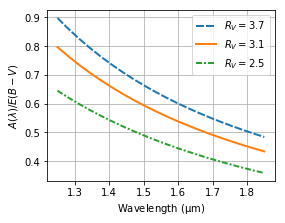

In [115]:
pyplot.figure(figsize=(4,3))

w = np.linspace(12500, 18500, 20)

a = E.curve(w, Rv=3.5)
pyplot.plot(w/1e4, a, dashes=[4,1], label="$R_V=3.7$",lw=2)

a = E.curve(w, Rv=3.1)
pyplot.plot(w/1e4, a, label="$R_V=3.1$", lw=2)

a = E.curve(w, Rv=2.5)
pyplot.plot(w/1e4, a, dashes=[3,1,1,1], label="$R_V=2.5$", lw=2)

pyplot.grid()
pyplot.xlabel("Wavelength ($\\rm \mu m$)")
pyplot.ylabel("$A(\lambda)/E(B-V)$")

pyplot.legend()
pyplot.subplots_adjust(left=0.2, bottom=0.2, top=0.99, right=0.99)
pyplot.savefig("ext_curve.pdf")